In [2]:
import os
from pathlib import Path
import warnings
import numpy as np
import pandas as pd
from IPython.display import display, HTML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer

# Cell 0: Common imports for reading CSVs and processing/visualizing data
%matplotlib inline
warnings.filterwarnings("ignore")


import matplotlib.pyplot as plt


# scikit-learn helpers commonly used in data processing

# sensible defaults for plotting and display
plt.rcParams["figure.figsize"] = (10, 6)
pd.options.display.max_columns = 50
pd.options.display.max_rows = 200

In [3]:
def read_csv_file(filepath, sep=",", encoding="utf-8", usecols=None, parse_dates=None,
                  na_values=None, dtype=None, nrows=None, verbose=False, **kwargs):
    """
    Read a CSV into a pandas DataFrame with sensible defaults and path checking.

    Parameters:
    - filepath: str or Path-like
    - sep: field delimiter (default ',')
    - encoding: file encoding (default 'utf-8')
    - usecols: list-like or callable, columns to read
    - parse_dates: list-like or dict, columns to parse as dates
    - na_values: additional strings to recognize as NA
    - dtype: dict of column dtypes
    - nrows: int, number of rows to read
    - verbose: if True, display shape and head
    - **kwargs: passed to pd.read_csv

    Returns:
    - pd.DataFrame
    """
    path = Path(filepath).expanduser()
    if not path.exists():
        raise FileNotFoundError(f"CSV file not found: {path}")

    try:
        df = pd.read_csv(path, sep=sep, encoding=encoding, usecols=usecols,
                         parse_dates=parse_dates, na_values=na_values,
                         dtype=dtype, nrows=nrows, **kwargs)
    except Exception as e:
        raise RuntimeError(f"Failed to read CSV {path}: {e}")

    if verbose:
        print(f"Loaded {path} -> shape: {df.shape}")
        display(df.head())

    return df

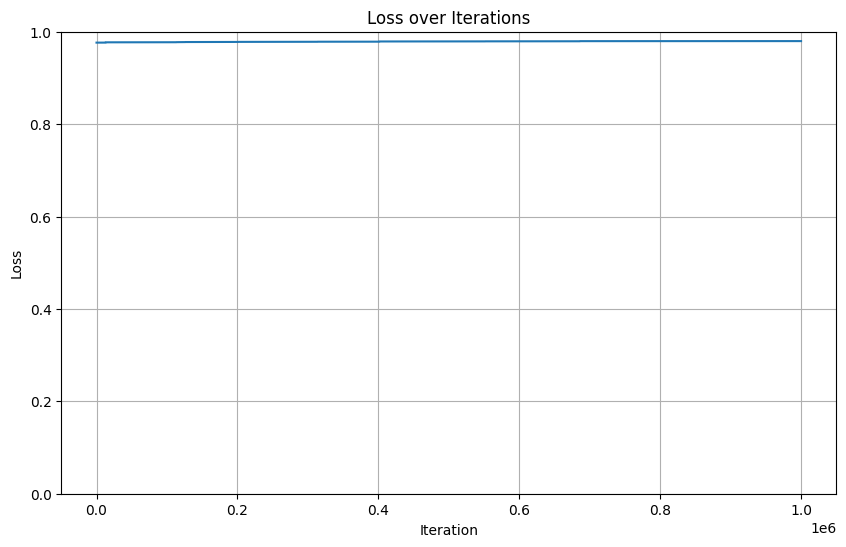

In [ ]:
df = read_csv_file("output/logs/bach/125/2025-11-08 17:41:41.csv")

max_loss = df['Temperature'][0]

X = df[['Iteration']].values
y = 1 - (df[['Best Global Loss']] / max_loss)

plt.plot(X, y)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.grid(True)

plt.ylim(0, 1)

plt.show()

In [6]:
from pathlib import Path

import matplotlib.pyplot as plt

def show_before_after(path):
    """
    Display two images side-by-side:
      - {path}_initialGuess.png
      - {path}_finalResult.png

    Parameters:
    - path: str or Path (without the trailing suffix)
    Returns:
    - (fig, (ax_left, ax_right))
    """
    p1 = Path(f"{path} initialGuess.png")
    p2 = Path(f"{path}_finalResult.png")

    if not p1.exists():
        raise FileNotFoundError(f"Image not found: {p1}")
    if not p2.exists():
        raise FileNotFoundError(f"Image not found: {p2}")

    img1 = plt.imread(p1)
    img2 = plt.imread(p2)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    for ax, img, title in ((ax1, img1, "Initial Guess"), (ax2, img2, "Final Result")):
        cmap = "gray" if img.ndim == 2 else None
        ax.imshow(img, cmap=cmap)
        ax.set_title(title)
        ax.axis("off")

    plt.tight_layout()
    plt.show()
    return fig, (ax1, ax2)

def show_before_after_difference(path):
    '''
    Display three images side-by-side:
      - {path}_initialGuess.png
      - {path}_finalResult.png
      - Difference image between the two
    '''
    p1 = Path(f"{path} initialGuess.png")
    p2 = Path(f"{path}_finalResult.png")

    if not p1.exists():
        raise FileNotFoundError(f"Image not found: {p1}")
    if not p2.exists():
        raise FileNotFoundError(f"Image not found: {p2}")

    img1 = plt.imread(p1)
    img2 = plt.imread(p2)

    diff_img = np.abs(img1 - img2)
    diff_img = np.mean(diff_img, axis=2)
    
    # diff_img = (diff_img - diff_img.min()) / (diff_img.max() - diff_img.min())
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
    for ax, img, title in ((ax1, img1, "Initial Guess"),
                            (ax2, img2, "Final Result"),
                            (ax3, diff_img, "Difference")):
          cmap = "gray" if img.ndim == 2 else None
          ax.imshow(img, cmap=cmap)
          ax.set_title(title)
          ax.axis("off")
    plt.tight_layout()
    plt.show()
    return fig, (ax1, ax2, ax3)

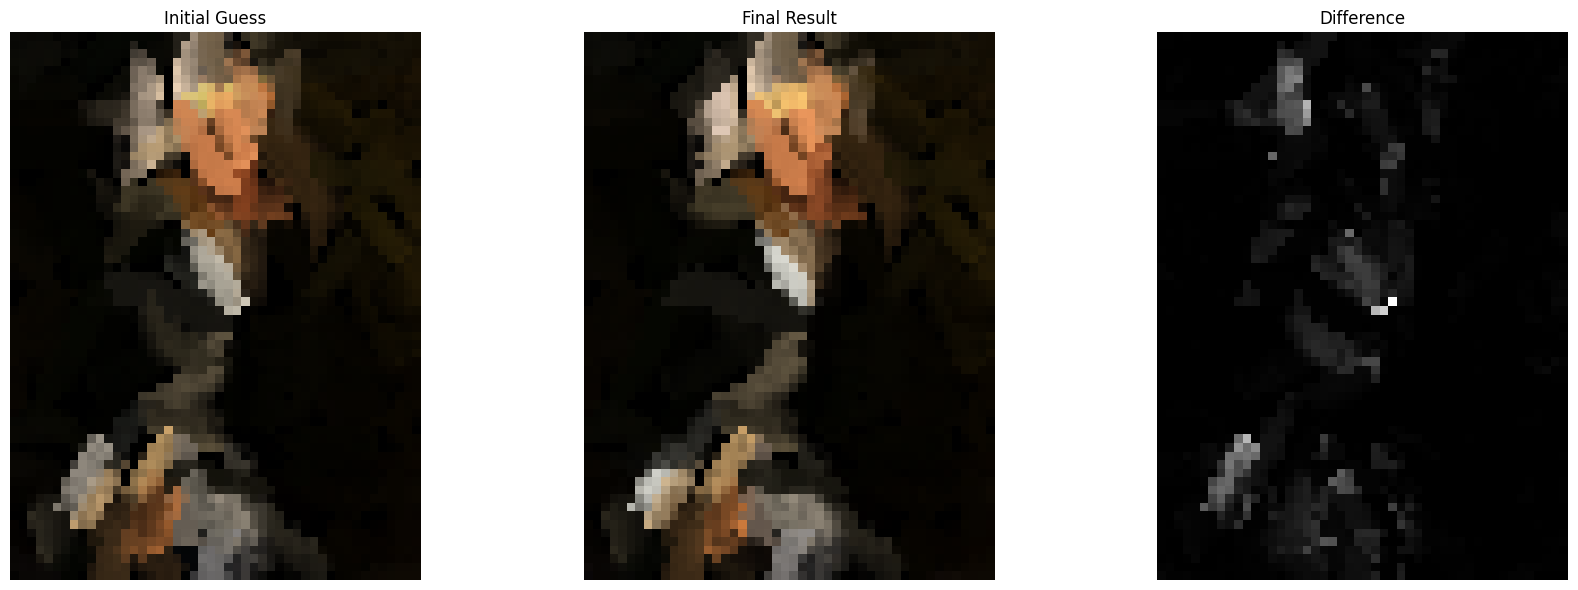

(<Figure size 1800x600 with 3 Axes>,
 (<Axes: title={'center': 'Initial Guess'}>,
  <Axes: title={'center': 'Final Result'}>,
  <Axes: title={'center': 'Difference'}>))

In [ ]:
show_before_after_difference("output/images/bach/125/2025-11-08 17:41:41")

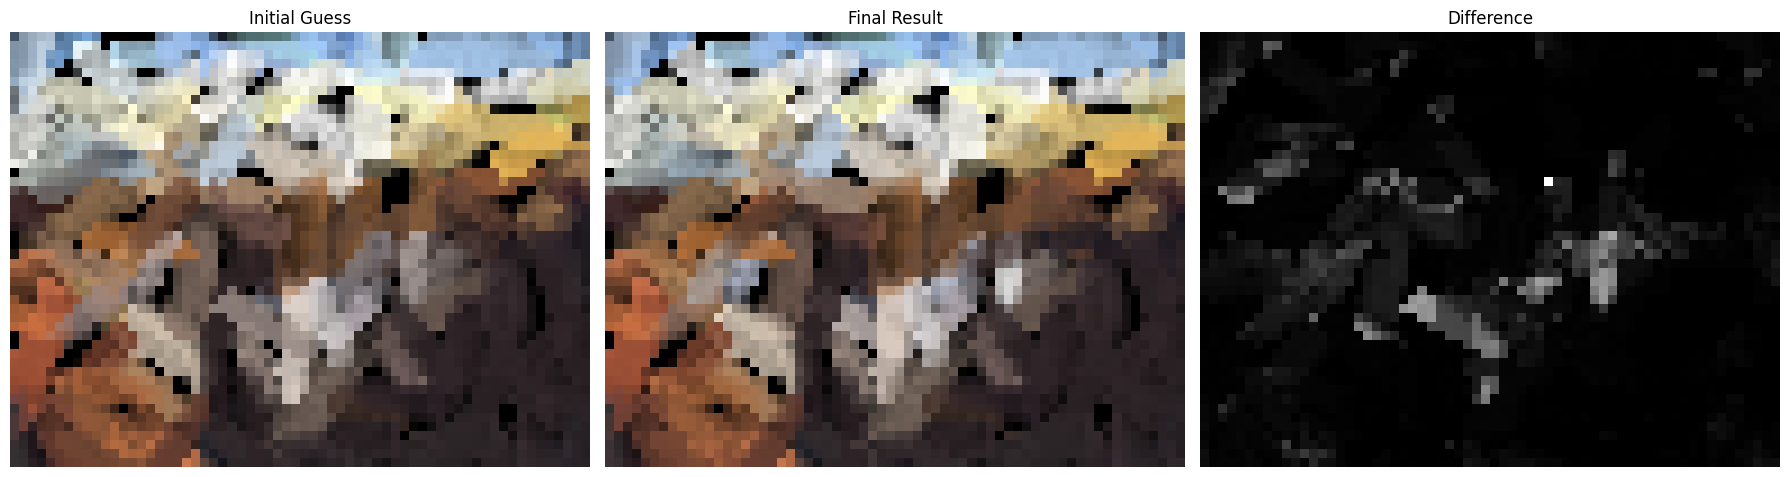

(<Figure size 1800x600 with 3 Axes>,
 (<Axes: title={'center': 'Initial Guess'}>,
  <Axes: title={'center': 'Final Result'}>,
  <Axes: title={'center': 'Difference'}>))

In [8]:
show_before_after_difference("output/images/dali/125/2025-11-08 18:10:53")

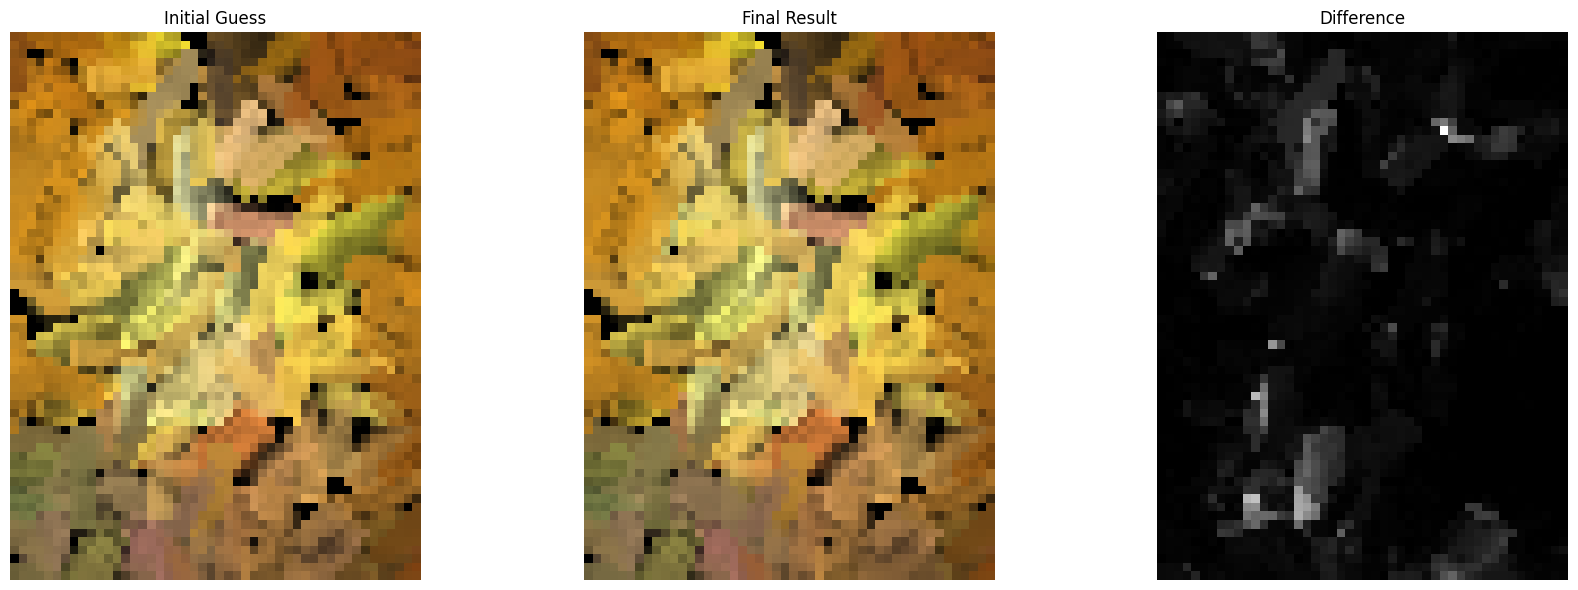

(<Figure size 1800x600 with 3 Axes>,
 (<Axes: title={'center': 'Initial Guess'}>,
  <Axes: title={'center': 'Final Result'}>,
  <Axes: title={'center': 'Difference'}>))

In [13]:
show_before_after_difference("output/images/klimt/125/2025-11-08 18:40:04")

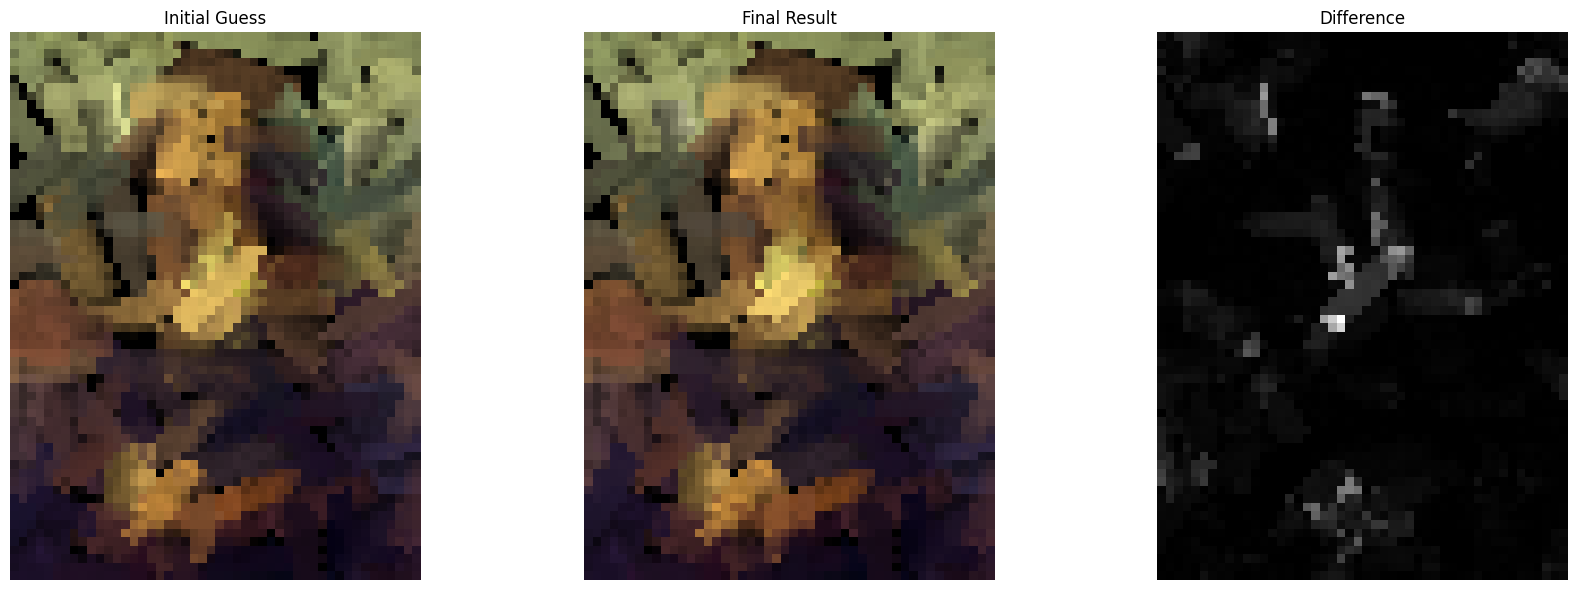

(<Figure size 1800x600 with 3 Axes>,
 (<Axes: title={'center': 'Initial Guess'}>,
  <Axes: title={'center': 'Final Result'}>,
  <Axes: title={'center': 'Difference'}>))

In [14]:
show_before_after_difference("output/images/mona/125/2025-11-08 19:09:19")

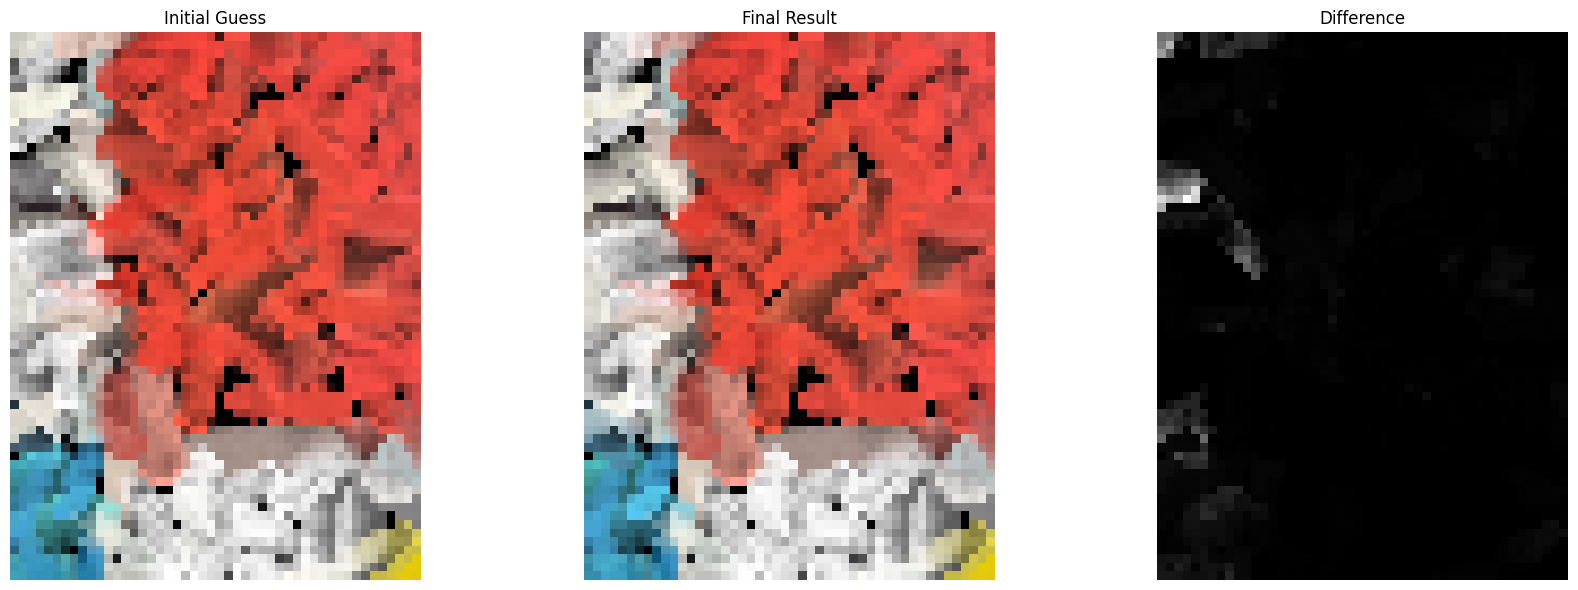

(<Figure size 1800x600 with 3 Axes>,
 (<Axes: title={'center': 'Initial Guess'}>,
  <Axes: title={'center': 'Final Result'}>,
  <Axes: title={'center': 'Difference'}>))

In [15]:
show_before_after_difference("output/images/mondriaan/125/2025-11-08 19:38:46")

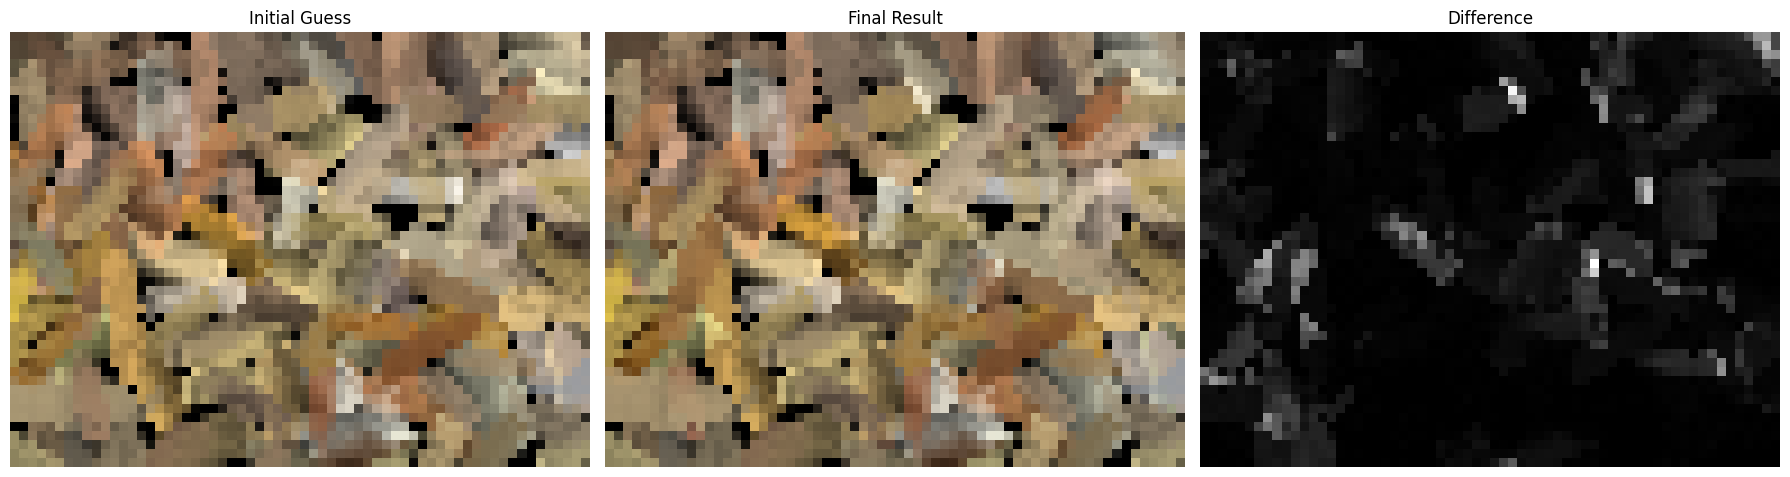

(<Figure size 1800x600 with 3 Axes>,
 (<Axes: title={'center': 'Initial Guess'}>,
  <Axes: title={'center': 'Final Result'}>,
  <Axes: title={'center': 'Difference'}>))

In [16]:
show_before_after_difference("output/images/pollock/125/2025-11-08 20:08:06")

In [ ]:
")